In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

# seperate the dataset to training data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

#Select an image from dataset and print the image
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')   

# if error: AttributeError: module 'matplotlib.colors' has no attribute 'to_rgba' occurs, 
# update matlotlib to latest version by run below command in Anaconda Prompt:
# conda update Matplotlib

# Reshaping and Normalizing the Images
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

8
x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [2]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the 2D arrays for fully connected layers
model.add(Flatten())                        
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

#Compiling and Fitting the Model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=2)

Using TensorFlow backend.


Epoch 1/2
60000/60000 [==============================] - 60s 1ms/step - loss: 0.2007 - acc: 0.9400
Epoch 2/2
60000/60000 [==============================] - 54s 902us/step - loss: 0.0790 - acc: 0.9757


In [3]:
#Evaluating the Model
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 244us/step


[0.05218366174986586, 0.9837]

9


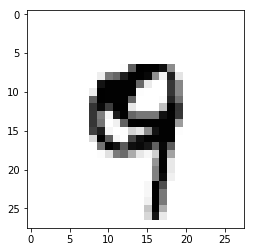

In [9]:
#Predicting new image
image_index = 4444  

plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())


In [6]:
# MIT course
# Deep Learning Basics

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Commonly used modules
import numpy as np
import os
import sys

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
#import seaborn as sns
#import cv2
import IPython
from six.moves import urllib

print(tf.__version__)
print(pd.__version__)
print(IPython.__version__)

1.10.0
0.18.1
6.5.0


In [4]:
# TIN175-AI-Project  
# Group Pong
# We use convolotional neural network(CNN) for flowers recognition.
# dataset used in this program: https://www.kaggle.com/alxmamaev/flowers-recognition/version/2

# 2019.02.14 first version   accuracy: 0.70
# 2019.XX.XX revised version: ways to imporove accuracy
#            larger piexl from 64 --> ?;
#            pre-processing (clean data);
#            cross-validation
#            learning rate?
# 2019.02.15 Adding plot to show loss and accuracy
# 2019.02.19 Add part 5: save trained model to files

# Questions: how to keep the trained model for later testing purpose?
#            save model as a file and imported to another file.
# Keep all the logs!

# Part 1 - Building the CNN

# Importing the Machine Learning Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Part 1: Processing the data
#print(os.listdir("dataset/training"))

#Data augmentation (seprate dataset to traing, validation and testing)
datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255)

training_set = datagen.flow_from_directory(r'dataset\training',
                                                 target_size = (64, 64),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

validation_set = validation_datagen.flow_from_directory(r'dataset\testing',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

# Part 2: Initialise the CNN model
model = Sequential()

# Step 1 - Add Convolutional layer
model.add(Convolution2D(16, kernel_size=(3,3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Add Pooling layer
model.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer and pooling layer
model.add(Convolution2D(16, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
model.add(Flatten())

# Step 4 - Full connection
model.add(Dense(output_dim = 128, activation = 'relu'))
model.add(Dense(output_dim = 5, activation = 'softmax'))

# Compiling the CNN
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

# Part 3 - Fitting the CNN to the images
History = model.fit_generator(training_set,
                             samples_per_epoch = 2589,
                             nb_epoch = 10,
                             validation_data = validation_set,
                             nb_val_samples = 868)

# Part 4: Evaluate the model performance

#Model loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

#Model accuracy
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

# Part 5: save trained model

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

# Part 5: Predicting new images

# Testing: predict new flower image --> another py file


['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
Found 2589 images belonging to 5 classes.


AttributeError: 'DirectoryIterator' object has no attribute 'summary'

Loaded model from disk
Found 867 images belonging to 5 classes.
The Actual flower is:
[0. 0. 0. 0. 1.]
The predicted flower is:
2


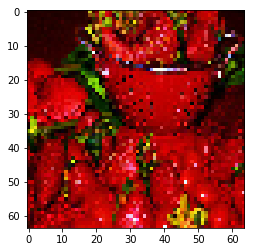

In [14]:
# -*- coding: utf-8 -*-
"""
Created on Tue Feb 19 13:29:08 2019

Using saved CNN model to predicting new images

@author: lizhichuan
"""
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image


X=[]
Z=[]
IMG_SIZE=64
FLOWER_DAISY_DIR='dataset/testing/daisy'
FLOWER_SUNFLOWER_DIR='dataset/testing/sunflower'
FLOWER_TULIP_DIR='dataset/testing/tulip'
FLOWER_DANDI_DIR='dataset/testing/dandelion'
FLOWER_ROSE_DIR='dataset/testing/rose'

def assign_label(img,flower_type):
    return flower_type
    
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))
 
make_train_data('Daisy',FLOWER_DAISY_DIR)
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
make_train_data('Tulip',FLOWER_TULIP_DIR)
make_train_data('Dandelion',FLOWER_DANDI_DIR)
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))   

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = tf.keras.models.model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

       

test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory(r'dataset\testing',
                                           target_size = (64, 64),
                                           batch_size = 867,
                                           class_mode = 'categorical')

x_test, y_test = test_set.next()
#x_test = x_test.reshape(x_test.shape[0], 64, 64, 1)

image_index = 10   # index maximum 866 (867 images in testing dataset)

print("The Actual flower is:")
print(y_test[image_index]) 

plt.imshow(x_test[image_index],cmap='Greys')
pred = loaded_model.predict(x_test[image_index].reshape(1, 64, 64, 3))
print("The predicted flower is:")
print(pred.argmax())



In [5]:
for x in range(1, 2):
  print(x) 
len(range(1,1))

1


0

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Fri Feb  1 15:45:42 2019
@Description: Image Classification in 10 Minutes with MNIST Dataset
@Source Article: 
    https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d

"""

# Downloading the Mnist Data
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# seperate the dataset to training data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

#Select an image from dataset and print the image
#image_index = 7777 # You may select anything up to 60,000
#print(y_train[image_index]) # The label is 8
#plt.imshow(x_train[image_index], cmap='Greys')   

# if error: AttributeError: module 'matplotlib.colors' has no attribute 'to_rgba' occurs, 
# update matlotlib to latest version by run below command in Anaconda Prompt:
# conda update Matplotlib

# Reshaping and Normalizing the Images
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

# Building the Convolutional Neural Network

# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5), input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the 2D arrays for fully connected layers
model.add(Flatten())                        
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

model.summary()

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               589952    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 592,074
Trainable params: 5